# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [3]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

The smartcab does not move at all. The rewards that are given in this stationary state are all based on the status of the traffic light in front of the vehicle as well as whether there is oncoming traffic. When the light turns red, the agent is given a moderate positive reward for "stopping" at a red light. As the light stays red, the agent is given a slightly smaller positive reward for remaining stopped at the red light. When the light turns green, if there is oncoming traffic, the agent is given a very small positive reward for idling while facing oncoming traffic. However, if there is no oncoming traffic, the agent is deducted a large penalty for being stopped at a green light while facing no oncoming traffic. Here, "large" is simply relative to the amounts of the other rewards seen when the agent does not move.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

Three flags that can be set in the agent.py file are num_dummies, grid_size, and enforce_deadline. num_dummies controls the number of agents there are driving in the environment other than your smartcab. grid_size controls the size of the environment, provided as a tuple containing the number of columns by the number of rows. enforce_deadline is a boolean which indicates whether a deadline will be imposed for completion of deliveries.

The function act is called when an agent performs an action.

render_text displays information in the terminal, while render changes the display of the GUI.

next_waypoint considers the East-West direction first.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


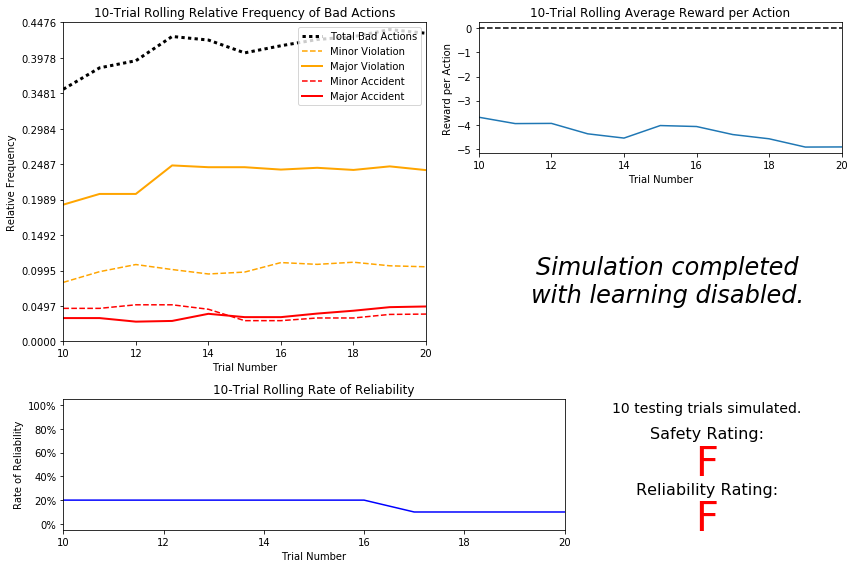

In [9]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

The agent seems to be making bad decisions at an average of around 40% of the time. An average of about 4% to 5% of the agent's actions result in bad accidents, and another 4% to 5% also result in minor accidents, so about 1/4 of the bad decisions result in accidents. Additionally, an average of about 23% of the agent's decisions result in major violations, and around 10% result in minor violations, together accounting for the remaining 3/4 of the bad actions.

Somewhat surprisingly, the agent achieves some level of reliability, averaging about 15% to 20% over the trials. This is not a good score, but it is surprisingly high, in my opinion. Because the agent is driving randomly, and not towards a specified destination, I am surprised that it ever reaches the destination. I guess that this is simply because the environment is not very large, and the agent is driving recklessly, and not stopping for red lights. A larger environment or a more cautious, but equally aimless, driver would probably result in almost no reliability.

The average reward was -4.49 per action across all trials trials, which indicates pretty heavy penalization. The largest penalty that was observed when the agent remained stationary was -5. While watching the random agent in the GUI, it was observed that the agent received a reasonable number of positive rewards by chance. Therefore, there must be some very low negative rewards being applied to bring the average down to -4.49.

As trials continue, the outcome of the trials remains about the same. There does appear to be a downward trend in the average reward, but this is likely a coincidence. Seeing as the agent is performing purely at random, there should be no way for an upward or downward trend to be established for any of the metrics.

This cab would not be conisdered safe or reliable. It gets in accidents around 10% of the time it is on the road, about half of which are considered "bad." Around 30% of the remaining time it is on the road, it is violating traffic laws. This is an absurdly bad driving performance, and perhaps worse than you might expect by putting a car into neutral and letting it coast through a neighborhood. In terms of reliability, the cab's best performance results in 20% reliability. So, four times out of five, you are going to be late for where you are trying to go - assuming you manage to make it there safely. These are both unacceptable to say the least.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:**

The most relevant for safety is 'light.' This is because the agent needs to know when to not cross the intersection, to avoid accidents. This feature is also very important for efficiency, because the agent also needs to know when to cross an intersection, in order to reach the waypoint in a reasonable time.

The next most important feature for safety is 'oncoming.' If the agent wants to make a left turn at a green light, it needs to know if there is any oncoming traffic. The four intended directions of the oncoming traffic are not each important, however. This feature space could be reduced to a binary feature that indicates whether there is an oncoming vehicle which is going straight or making a right turn. If there is no oncoming vehicle, or there is one, and it is making a left turn, the driving agent can still make a left turn or go straight, assuming the other agent follows right-of-way laws.

The most important feature for efficiency is 'waypoint,' because the agent has to know where it needs to go in order to get there in a reasonable amount of time.

Another important feature for efficiency is 'left.' This is important for allowing the driver to learn to make right turns at red lights. Similarly to 'oncoming,' we do not need to know the intended direction of a vehicle on the left. We only need to know if a vehicle is coming from that direction at all. Therefore, this can also be reduced to a binary feature which is ('left' is None).

Features I did not include are 'right' and 'deadline.' I did not choose 'right' because it is not relevant for learning either safety or efficiency, assuming that dummy drivers follow the law. The only time the agent should cross the path of a vehicle coming from the right, the vehicle from the right will have a red light, and the agent will have a green light. If the dummy agent follows the law, there will be no risk of accident in these cases. I did not choose 'deadline' because knowing how much time is left will not help the agent drive more efficiently or safely. The agent should drive as efficiently and safely as possible, regardless of how many actions are remaining.



### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

The size of the state space is 24 (2 possible states for 'light': 'red' and 'green'; 2 possible states for derived feature 'left_present': True and False; 2 possible states for derived feature 'oncoming_straight_or_right': True and False; and 3 possible states for 'waypoint': 'right,' 'forward,' and 'left').

This seems like a number of states for which the agent could learn a policy in a reasonable number of training trials. If each trial lasts about 20 moves, it seems plausible that a decent policy could be learned for each state within 10 trials.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

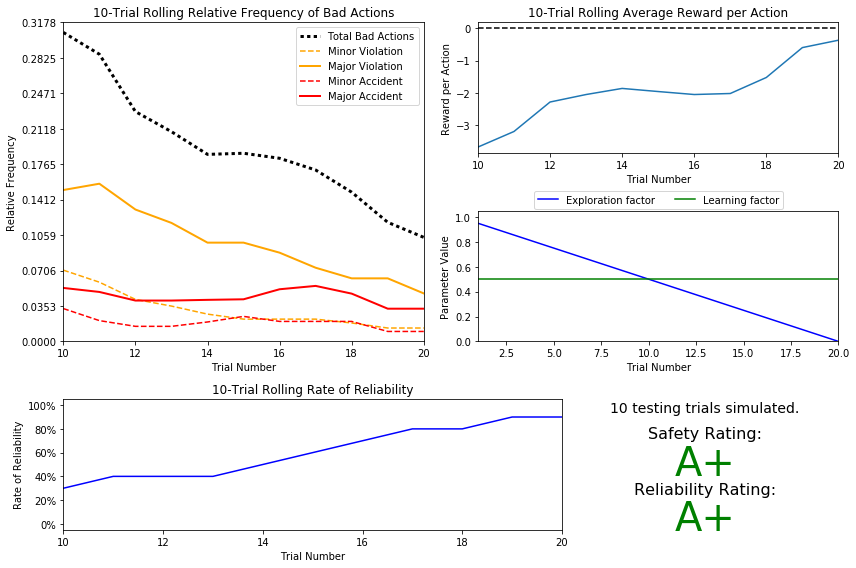

In [18]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

This default Q-learning agent performed significantly better than the basic agent, in every metric.  The default Q-learning agent achieved perfect reliability in its testing trials, compared with 30% in the testing trials of the basic agent.  The default Q-learning agent also achieved perfect safety in its test trials, while the basic agent made bad decisions nearly half of the time.  The default Q-learning agent received an average reward of 1.79 per action in its test trials, and the basic agent received an average of -4.86 per action in its test trials.  All of the learning agents metrics trended towards the ideal values, while the basic agent's metrics did not display any trends.

Twenty training trials were required before testing, which makes sense.  The epsilon tolerance was set to 0.05 and the decay rate was -0.05 per trial.  Therefore, it would take 20 trials for the epsilon value to decay below the tolerance.  Also, we can see that the decay function worked as expected, by viewing the decay rate in the parameters table.  It clearly decreases by 0.05 per trial.

The number of bad actions did decrease as training trials went on.  Sometimes the reward would decrease from one training trial to the next, but this can be attributed to the random actions taken during training, as well as the imperfected policy resulting in the occasional major accident or violation.

The safety and reliability ratings were as different as they possibly could be from those of the initial agent.  I expected them to improve, but I was surprised to see them improve by this much.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

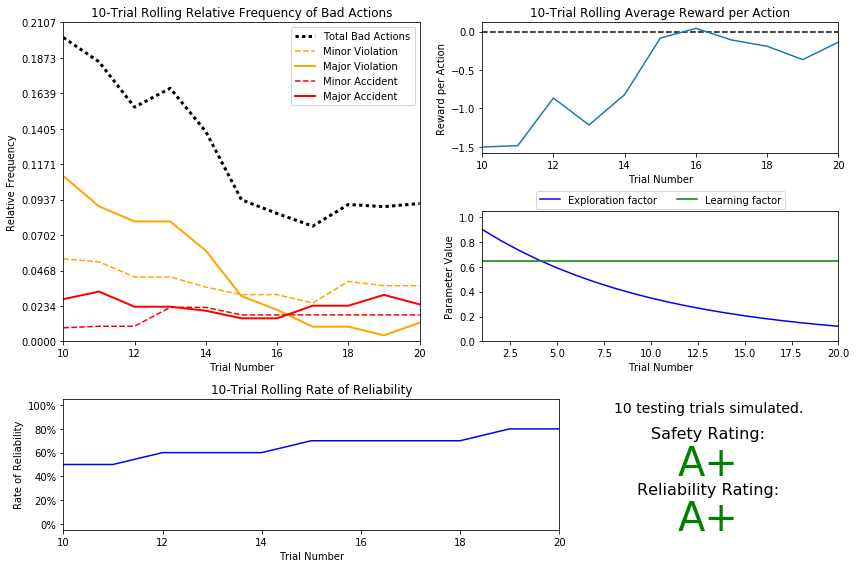

In [14]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

The decaying function of 0.9^t was used.  20 training trials were required.  Using the original tolerance value of 0.05, more training trials were used, but in an effort to test the limits of my implementation, I increased the tolerance value.

The tolerance value I used was 0.15 and the alpha value was 0.65.  I used this tolerance value, because I wanted to get the best results possible with the same number of training trials as the previous two implementations.  However, I wanted my exploration factor to decrease very gradually, and therefore wanted to use my function of epsilon=0.9^t.  I reached the alpha value by trial and error.  I tried the default of 0.5, followed by 0.6, 0.7, and 0.8.  The performance improved when going from 0.5 to 0.6, it stayed about the same from 0.6 to 0.7, and it regressed from 0.7 to 0.8.  This led me to believe that the optimal performance occurred with a learning rate between 0.6 and 0.7. I took a similar approach and tried learning rates of 0.63, 0.65, and 0.67 to find that the best performance out of these values was achieved with a learning rate of 0.65.  At this point, the agent achieved perfect scores in both metrics.

There was no noticeable improvement between the two learning agents, and in fact, the default learner scored slightly better in testing trials, receiving an average of .04 more reward per action.  It seems like the model that I chose is very effective for this problem.  

I am quite satisfied with the ratings of the smartcab for both of the learning agents.  In their testing trials, each of them achieved perfect reliability and safety scores.  This is as good as it gets.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** 

| Waypoint | Light | Oncoming Going Right or Straight | Left Present | Optimal |
|:-----:   |:------:	|:-----------:	|:-----------:	| :-----------:	|
| left     | red   |      True          |  False       | None |
| forward  | green |  True |  True  |  forward |
| right | red | True | False | right |
| left | green | False | True | left |

For each of the recorded states, the policy is correct, or at worst, ambiguous.  An example of a state that has an ambiguous policy is ('left', 'red', True, True) which has a policy of {forward: 0, right: -12.9, None: 0, left: 0}.  For this, I would expect None to have the highest score, but it appears that not enough training trials were performed to fully calculate a policy for each score.  There are 4 other states with similarly under-calculated scores, which could have led to some incidents.  I guess that those states were not encountered during testing.

One state that has a correct policy, which is a good demonstration of an understanding of right-of-way laws is ('right', 'red', True, False) which has scores of {forward: -6.54, right: 1.54, None: 0.00, left: 0.00}.  This state represents the scenario where the direction to the waypoint is right, the light is red, there is an oncoming agent which is either turning right or going straight, and there is no agent coming from the left.  In this case, the driver would want to make a right turn at the red light, and it would be legal and safe.  That is exactly what the policy indicates.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

I can think of two characteristics of the project that invalidate the use of future rewards.  One is the fact that the environment is constantly changing, so you don't know what future states are possible given a tranisition.  The only feature that you can predict in future states is 'waypoint.'  Therefore, there is no way to predict future rewards of an action.  Another characteristic is that the driver does not know its distance from the destination.  It only knows the direction to the destination from its current state.  Therefore, the driver could not behave differently based on the likelihood of reaching the destination by taking one action versus another.  

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.